# Setting

In [169]:
import pandas as pd

In [170]:
import numpy as np

# Data import

In [171]:
eat = pd.read_csv('eat.csv', engine='python')

eat.sample()

,닉네임,날짜,식사 시각,식사 메뉴,맵기,매운거,차가운거,커피,탄산,술,"유제품, 두유",물,"채소, 과일",유산균,특이사항
625,해달,2019-08-08,12:00,"닭가슴살 샐러드, 단호박 샌드위치",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"양배추, 토마토, 단호박",0.0,NaN


# Data Preprocessing
- 요일칼럼 추가
    - 요일별 식습관, 배변 패턴 보기, 
    - 수업 없는날
- 날짜 datetime
- 카테고리 0, 1 로 분류
- 안쓰는 칼럼 drop

## Null 값 제외

In [172]:
eat.tail()

,닉네임,날짜,식사 시각,식사 메뉴,맵기,매운거,차가운거,커피,탄산,술,"유제품, 두유",물,"채소, 과일",유산균,특이사항
668,해달,2019-09-03,23:00,"홍합찜, 소고기",NaN,NaN,NaN,NaN,NaN,"와인 한잔, 맥주 한잔",NaN,400,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
eat = eat[:669]

eat.tail()

,닉네임,날짜,식사 시각,식사 메뉴,맵기,매운거,차가운거,커피,탄산,술,"유제품, 두유",물,"채소, 과일",유산균,특이사항
664,해달,2019-09-03,19:00,"떡볶이, 치킨",NaN,NaN,NaN,NaN,콜라,NaN,NaN,NaN,NaN,NaN,NaN
665,해달,2019-09-04,11:00,"복숭아, 아이스 아메리카노",NaN,NaN,아이스 아메리카노,아이스 아메리카노,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,해달,2019-09-04,18:00,"김밥, 라면",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,해달,2019-08-21,12:00,"김밥, 머핀",2.0,김밥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
668,해달,2019-09-03,23:00,"홍합찜, 소고기",NaN,NaN,NaN,NaN,NaN,"와인 한잔, 맥주 한잔",NaN,400,NaN,NaN,NaN


## Column cleaning

In [174]:
# 맵기 -> Spicy_Measure
eat['Spicy_Measure'] = np.nan
eat.loc[eat['맵기'] == 1.0, 'Spicy_Measure'] = 1
eat.loc[eat['맵기'] == 2.0, 'Spicy_Measure'] = 2
eat.loc[eat['맵기'] == 3.0, 'Spicy_Measure'] = 3

eat[['맵기', 'Spicy_Measure']].sample()

,맵기,Spicy_Measure
441,1.0,1.0


In [175]:
eat.loc[0, '매운거']

nan

In [176]:
# 매운거 -> Spicy 0, 1
eat['Spicy'] = 1
eat.loc[eat['매운거'].isnull(), 'Spicy'] = 0

eat[['매운거', 'Spicy']].sample()

,매운거,Spicy
596,NaN,0


In [177]:
eat['Cold'] = 1
eat.loc[eat['차가운거'].isnull(), 'Cold'] = 0
eat.loc[eat['차가운거'] == '-', 'Cold'] = 0

eat[['차가운거', 'Cold']].sample()

,차가운거,Cold
183,아메리카노,1


In [178]:
eat['Coffee'] = 1
eat.loc[eat['커피'].isnull(), 'Coffee'] = 0

eat[['커피', 'Coffee']].sample()

,커피,Coffee
4,NaN,0


In [179]:
eat['CO2'] = 1
eat.loc[eat['탄산'].isnull(), 'CO2'] = 0
eat.loc[eat['탄산'] == '-', 'CO2'] = 0

eat[['탄산', 'CO2']].sample()

,탄산,CO2
545,NaN,0


In [180]:
eat['Alcohol'] = 1
eat.loc[eat['술'].isnull(), 'Alcohol'] = 0
eat.loc[eat['술'] == '-', 'Alcohol'] = 0

eat[['술', 'Alcohol']].sample()

,술,Alcohol
106,NaN,0


In [181]:
eat.columns

Index(['닉네임', '날짜', '식사 시각', '식사 메뉴', '맵기', '매운거', '차가운거', '커피', '탄산', '술',
       '유제품, 두유', '물', '채소, 과일', '유산균', '특이사항', 'Spicy_Measure', 'Spicy',
       'Cold', 'Coffee', 'CO2', 'Alcohol'],
      dtype='object')

In [182]:
eat['Milk'] = 1
eat.loc[eat['유제품, 두유'].isnull(), 'Milk'] = 0
eat.loc[eat['유제품, 두유'] == '-', 'Milk'] = 0

eat[['유제품, 두유', 'Milk']].sample()

,"유제품, 두유",Milk
85,NaN,0


In [183]:
eat['Vegitable'] = 1
eat.loc[eat['채소, 과일'].isnull(), 'Vegitable'] = 0
eat.loc[eat['채소, 과일'] == '-', 'Vegitable'] = 0

eat[['채소, 과일', 'Vegitable']].sample()

,"채소, 과일",Vegitable
149,NaN,0


In [184]:
eat['Loctobacillus'] = 1
eat.loc[eat['유산균'].isnull(), 'Loctobacillus'] = 0
eat.loc[eat['유산균'] == '-', 'Loctobacillus'] = 0

eat[['유산균', 'Loctobacillus']].sample()

C:\Users\Minju\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,유산균,Loctobacillus
457,0.0,1


In [185]:
eat['Extraordinary'] = 1
eat.loc[eat['특이사항'].isnull(), 'Extraordinary'] = 0
eat.loc[eat['특이사항'] == '-', 'Extraordinary'] = 0

eat[['특이사항', 'Extraordinary']].sample()

,특이사항,Extraordinary
418,NaN,0


In [186]:
eat['Water'] = 1
eat.loc[eat['물'].isnull(), 'Water'] = 0
eat.loc[eat['물'] == '-', 'Water'] = 0

eat[['물', 'Water']].sample()

,물,Water
436,NaN,0


In [187]:
eat['Water_Amount'] = eat['물']
eat.loc[eat['물'].isnull(), 'Water_Amount'] = 0
eat.loc[eat['물'] == '-', 'Water_Amount'] = 0

eat[['물', 'Water_Amount']].sample()

,물,Water_Amount
547,NaN,0


In [188]:
eat.sample()

,닉네임,날짜,식사 시각,식사 메뉴,맵기,매운거,차가운거,커피,탄산,술,...,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,Extraordinary,Water,Water_Amount
106,가오리,2019-09-09,12:00,소고기콩나물국,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,1,1000


## Datetime

In [189]:
eat['Datetime'] = pd.to_datetime(eat['날짜'])

eat[['날짜', 'Datetime']].sample()
eat.dtypes

닉네임                      object
날짜                       object
식사 시각                    object
식사 메뉴                    object
맵기                      float64
매운거                      object
차가운거                     object
커피                       object
탄산                       object
술                        object
유제품, 두유                  object
물                        object
채소, 과일                   object
유산균                     float64
특이사항                     object
Spicy_Measure           float64
Spicy                     int64
Cold                      int64
Coffee                    int64
CO2                       int64
Alcohol                   int64
Milk                      int64
Vegitable                 int64
Loctobacillus             int64
Extraordinary             int64
Water                     int64
Water_Amount             object
Datetime         datetime64[ns]
dtype: object

In [190]:
eat['Year'] = eat['Datetime'].dt.year
eat['Month'] = eat['Datetime'].dt.month
eat['Day'] = eat['Datetime'].dt.day

eat[['Datetime', 'Year', 'Month', 'Day']].sample()

,Datetime,Year,Month,Day
334,2019-08-08,2019,8,8


In [191]:
eat['Weekday'] = eat['Datetime'].apply(lambda x: x.day_name())

eat[['Datetime', 'Weekday']].sample()

,Datetime,Weekday
402,2019-09-10,Tuesday


In [192]:
eat['MON'] = False
eat['TUE'] = False
eat['WED'] = False
eat['THU'] = False
eat['FRI'] = False
eat['SAT'] = False

eat.loc[eat['Weekday'] == 'Monday', 'MON'] = True 
eat.loc[eat['Weekday'] == 'Tuesday', 'TUE'] = True 
eat.loc[eat['Weekday'] == 'Wednesday', 'WED'] = True 
eat.loc[eat['Weekday'] == 'Thursday', 'THU'] = True 
eat.loc[eat['Weekday'] == 'Friday', 'FRI'] = True 
eat.loc[eat['Weekday'] == 'Saturday', 'SAT'] = True 

eat[['Weekday', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']].sample()

,Weekday,MON,TUE,WED,THU,FRI,SAT
627,Friday,False,False,False,False,True,False


In [193]:
eat['Hour'] = pd.to_datetime(eat['식사 시각']).dt.hour
eat['Minute'] = pd.to_datetime(eat['식사 시각']).dt.minute

eat[['식사 시각', 'Hour', 'Minute']].sample()

,식사 시각,Hour,Minute
72,14:00,14,0


In [194]:
eat['닉네임'].unique()

array(['가오리', '늑대', '늑대 ', '다람쥐', '카이로스', '판다', '해달', '해달 '], dtype=object)

In [195]:
eat['닉네임(clean)'] = [x.strip() for x in eat['닉네임']]

eat.loc[eat['닉네임(clean)'] == '가오리', 'Name'] = 'gaori'
eat.loc[eat['닉네임(clean)'] == '해달', 'Name'] = 'hae'
eat.loc[eat['닉네임(clean)'] == '늑대', 'Name'] = 'wolf'
eat.loc[eat['닉네임(clean)'] == '카이로스', 'Name'] = 'kairos'
eat.loc[eat['닉네임(clean)'] == '다람쥐', 'Name'] = 'squirrel'
eat.loc[eat['닉네임(clean)'] == '판다', 'Name'] = 'panda'

eat[['닉네임', 'Name']].sample()

,닉네임,Name
574,판다,panda


## Drop Columns

In [196]:
columns = ['닉네임', '닉네임(clean)', '날짜', '식사 시각', '식사 메뉴', '맵기', '매운거', '차가운거', '커피', '탄산', '술', '유제품, 두유', '채소, 과일', '유산균', '물', '특이사항']

eat_df = eat.drop(columns=columns, axis=1)
eat_df.sample()

,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,Extraordinary,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
323,NaN,0,0,0,0,0,0,0,1,0,...,Monday,True,False,False,False,False,False,13,30,squirrel


## Save as csv

In [197]:
eat_df.to_csv('eat_df.csv')

## 배변 패턴 데이터

In [198]:
poop = pd.read_csv('poop.csv', engine='python')

poop.sample()

,닉네임,날짜,화장실 간 시각,걸린 시간,쾌변 / 애매 / 시도,쾌변 여부,쾌변 패턴,생리,Unnamed: 8
192,해달,2019-08-10,12:40,10.0,쾌변,O,NaN,1.0,NaN


## Null 값 처리

In [199]:
poop.isnull().sum()

닉네임              13
날짜               13
화장실 간 시각         13
걸린 시간            29
쾌변 / 애매 / 시도     19
쾌변 여부           108
쾌변 패턴           222
생리               86
Unnamed: 8      227
dtype: int64

In [200]:
# 없는 데이터 제외
poop = poop[:214]

In [201]:
poop[poop['화장실 간 시각'] == '기억안남']

,닉네임,날짜,화장실 간 시각,걸린 시간,쾌변 / 애매 / 시도,쾌변 여부,쾌변 패턴,생리,Unnamed: 8
27,가오리,2019-08-23,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
28,가오리,2019-08-24,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
29,가오리,2019-08-25,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
30,가오리,2019-08-26,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
31,가오리,2019-08-27,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
32,가오리,2019-08-28,기억안남,NaN,NaN,NaN,NaN,NaN,NaN
35,가오리,2019-08-31,기억안남,NaN,애매,NaN,NaN,NaN,NaN
36,가오리,2019-09-01,기억안남,NaN,애매,NaN,NaN,NaN,NaN
37,가오리,2019-09-02,기억안남,NaN,쾌변,NaN,NaN,NaN,NaN
38,가오리,2019-09-03,기억안남,NaN,쾌변,NaN,NaN,NaN,NaN


## Datetime

In [202]:
poop['Datetime'] = pd.to_datetime(poop['날짜'])

poop[['날짜', 'Datetime']].sample()
poop.dtypes

닉네임                     object
날짜                      object
화장실 간 시각                object
걸린 시간                  float64
쾌변 / 애매 / 시도            object
쾌변 여부                   object
쾌변 패턴                   object
생리                     float64
Unnamed: 8             float64
Datetime        datetime64[ns]
dtype: object

In [203]:
poop['Year'] = poop['Datetime'].dt.year
poop['Month'] = poop['Datetime'].dt.month
poop['Day'] = poop['Datetime'].dt.day

poop[['Datetime', 'Year', 'Month', 'Day']].sample()

,Datetime,Year,Month,Day
82,2019-08-17,2019,8,17


In [204]:
poop['Weekday'] = poop['Datetime'].apply(lambda x: x.day_name())

poop[['Datetime', 'Weekday']].sample()

,Datetime,Weekday
195,2019-08-11,Sunday


In [205]:
poop['MON'] = False
poop['TUE'] = False
poop['WED'] = False
poop['THU'] = False
poop['FRI'] = False
poop['SAT'] = False

poop.loc[eat['Weekday'] == 'Monday', 'MON'] = True 
poop.loc[eat['Weekday'] == 'Tuesday', 'TUE'] = True 
poop.loc[eat['Weekday'] == 'Wednesday', 'WED'] = True 
poop.loc[eat['Weekday'] == 'Thursday', 'THU'] = True 
poop.loc[eat['Weekday'] == 'Friday', 'FRI'] = True 
poop.loc[eat['Weekday'] == 'Saturday', 'SAT'] = True 

poop[['Weekday', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']].sample()

,Weekday,MON,TUE,WED,THU,FRI,SAT
111,Friday,False,False,True,False,False,False


## Column Cleaning

In [206]:
poop['화장실 간 시각(clean)'] = poop['화장실 간 시각']
poop.loc[poop['화장실 간 시각'] == '기억안남', '화장실 간 시각(clean)'] = 0

poop[['화장실 간 시각', '화장실 간 시각(clean)']].sample()

,화장실 간 시각,화장실 간 시각(clean)
75,18:00,18:00


In [207]:
poop['Hour'] = pd.to_datetime(poop['화장실 간 시각(clean)']).dt.hour
poop['Minute'] = pd.to_datetime(poop['화장실 간 시각(clean)']).dt.minute

poop[['화장실 간 시각(clean)', 'Hour', 'Minute']].sample()

,화장실 간 시각(clean),Hour,Minute
203,9:00,9,0


In [208]:
poop['Time'] = poop['걸린 시간']

In [209]:
poop['Status'] = np.nan

poop.loc[poop['쾌변 / 애매 / 시도'] == '쾌변', 'Status'] = 'Good'
poop.loc[poop['쾌변 / 애매 / 시도'] == '애매', 'Status'] = 'Soso'
poop.loc[poop['쾌변 / 애매 / 시도'] == '시도', 'Status'] = 'Try'


poop['Good'] = False
poop['Soso'] = False

poop.loc[poop['쾌변 / 애매 / 시도'] == '쾌변', 'Good'] = True
poop.loc[poop['쾌변 / 애매 / 시도'] == '애매', 'Soso'] = True

poop[['쾌변 / 애매 / 시도', 'Status', 'Good', 'Soso']]

,쾌변 / 애매 / 시도,Status,Good,Soso
0,애매,Soso,False,True
1,애매,Soso,False,True
2,애매,Soso,False,True
3,애매,Soso,False,True
4,쾌변,Good,True,False
5,쾌변,Good,True,False
6,쾌변,Good,True,False
7,애매,Soso,False,True
8,쾌변,Good,True,False
9,쾌변,Good,True,False


In [210]:
poop['Menstruation'] = poop['생리']

poop.loc[poop['생리'].isnull(), 'Menstruation'] = 0

poop[['생리', 'Menstruation']].sample()

,생리,Menstruation
207,0.0,0.0


In [211]:
poop.sample()

,닉네임,날짜,화장실 간 시각,걸린 시간,쾌변 / 애매 / 시도,쾌변 여부,쾌변 패턴,생리,Unnamed: 8,Datetime,...,FRI,SAT,화장실 간 시각(clean),Hour,Minute,Time,Status,Good,Soso,Menstruation
39,가오리,2019-09-04,기억안남,NaN,쾌변,NaN,NaN,NaN,NaN,2019-09-04,...,False,False,0,0,0,NaN,Good,True,False,0.0


In [212]:
poop['닉네임'].unique()

array(['가오리', '늑대', '다람쥐', '카이로스', '판다', '해달'], dtype=object)

In [213]:
poop['닉네임(clean)'] = [x.strip() for x in poop['닉네임']]

poop.loc[poop['닉네임(clean)'] == '가오리', 'Name'] = 'gaori'
poop.loc[poop['닉네임(clean)'] == '해달', 'Name'] = 'hae'
poop.loc[poop['닉네임(clean)'] == '늑대', 'Name'] = 'wolf'
poop.loc[poop['닉네임(clean)'] == '카이로스', 'Name'] = 'kairos'
poop.loc[poop['닉네임(clean)'] == '다람쥐', 'Name'] = 'squirrel'
poop.loc[poop['닉네임(clean)'] == '판다', 'Name'] = 'panda'

poop[['닉네임', 'Name']].sample()

,닉네임,Name
103,다람쥐,squirrel


# Drop Columns

In [214]:
columns = ['닉네임','닉네임(clean)', '날짜', '화장실 간 시각', '화장실 간 시각(clean)', '걸린 시간', '쾌변 / 애매 / 시도', '쾌변 여부', '쾌변 패턴', '생리', 'Unnamed: 8']

poop_df = poop.drop(columns=columns)

poop_df.sample()

,Datetime,Year,Month,Day,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Time,Status,Good,Soso,Menstruation,Name
12,2019-08-09,2019,8,9,Friday,True,False,False,False,False,False,20,0,15.0,Soso,False,True,0.0,gaori


## Save as CSV

In [215]:
poop_df.to_csv('poop_df.csv')

# Visualization

In [216]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

## Eat Data

In [217]:
eat_df = pd.read_csv('eat_df.csv')

### 닉네임별 DataFrame

In [218]:
gaori = eat_df[eat_df['Name'] == 'gaori']

print(gaori.shape)
gaori.sample()

(163, 27)


,Unnamed: 0,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
74,74,NaN,0,0,0,0,1,0,0,0,...,Thursday,False,False,False,True,False,False,19,0,gaori


In [49]:
wolf = eat_df[eat_df['Name'] == 'wolf']

print(wolf.shape)
wolf.sample()

(147, 26)


,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,Extraordinary,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
203,NaN,0,0,0,0,0,0,0,1,0,...,Thursday,False,False,False,True,False,False,8,0,wolf


In [219]:
hae = eat_df[eat_df['Name'] == 'hae']

print(hae.shape)
hae.sample()

(62, 27)


,Unnamed: 0,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
647,647,2.0,1,1,0,1,0,0,0,1,...,Saturday,False,False,False,False,False,True,18,20,hae


In [220]:
squirrel = eat_df[eat_df['Name'] == 'squirrel']

print(squirrel.shape)
squirrel.sample()

(146, 27)


,Unnamed: 0,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
386,386,NaN,0,0,0,0,0,1,0,0,...,Thursday,False,False,False,True,False,False,9,0,squirrel


In [221]:
kairos = eat_df[eat_df['Name'] == 'kairos']

print(kairos.shape)
kairos.sample()

(59, 27)


,Unnamed: 0,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
471,471,1.0,0,0,0,0,0,0,0,1,...,Tuesday,False,True,False,False,False,False,19,0,kairos


In [222]:
panda = eat_df[eat_df['Name'] == 'panda']

print(panda.shape)
panda.sample()

(92, 27)


,Unnamed: 0,Spicy_Measure,Spicy,Cold,Coffee,CO2,Alcohol,Milk,Vegitable,Loctobacillus,...,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Name
587,587,NaN,0,1,0,1,1,0,0,1,...,Monday,True,False,False,False,False,False,20,30,panda


In [223]:
gaori.columns

Index(['Unnamed: 0', 'Spicy_Measure', 'Spicy', 'Cold', 'Coffee', 'CO2',
       'Alcohol', 'Milk', 'Vegitable', 'Loctobacillus', 'Extraordinary',
       'Water', 'Water_Amount', 'Datetime', 'Year', 'Month', 'Day', 'Weekday',
       'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'Hour', 'Minute', 'Name'],
      dtype='object')

# 전체 변수 관계도

In [224]:
# sns.pairplot(eat_df, hue='Name')

# 날짜별 식사 횟수

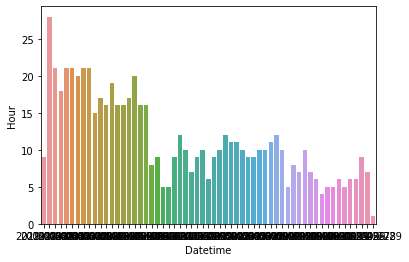

In [232]:
data = eat_df.groupby('Datetime')['Hour'].size().reset_index()

sns.barplot(x='Datetime', y='Hour', data=data)

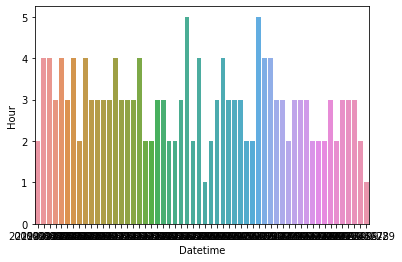

In [226]:
data = gaori.groupby('Datetime')['Hour'].size().reset_index()

sns.barplot(x='Datetime', y='Hour', data=data)

#### 개인별 총 배변횟수

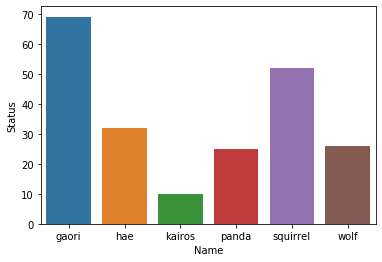

In [411]:
data = poop_df.groupby('Name')['Status'].size().reset_index()

sns.barplot(x='Name', y='Status', data=data)

#### 개인별 배변 시간 총합

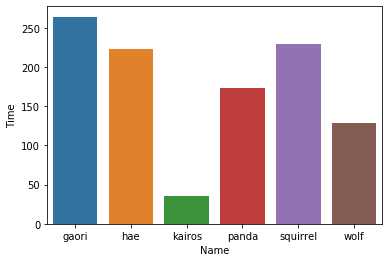

In [412]:
data = poop_df.groupby('Name')['Time'].sum().reset_index()

sns.barplot(x='Name', y='Time', data=data)

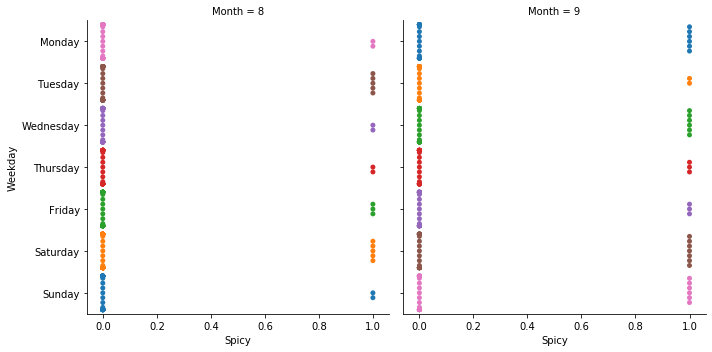

In [242]:
# 요일별 술 등 카테고리 분포(컬러별)
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][::-1]

sns.catplot(y='Weekday', x='Spicy', kind='swarm', col='Month', order=weekday, data=eat_df)

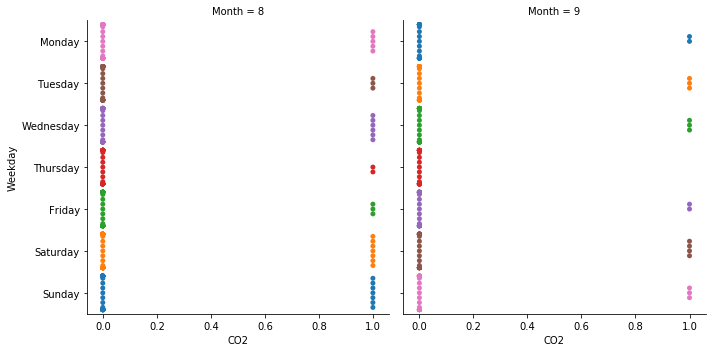

In [243]:
sns.catplot(y='Weekday', x='CO2', kind='swarm', col='Month',order=weekday, data=eat_df)

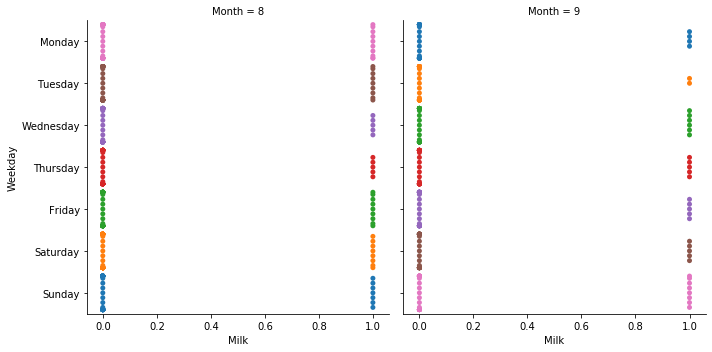

In [245]:
sns.catplot(y='Weekday', x='Milk', kind='swarm', col='Month', order=weekday, data=eat_df)

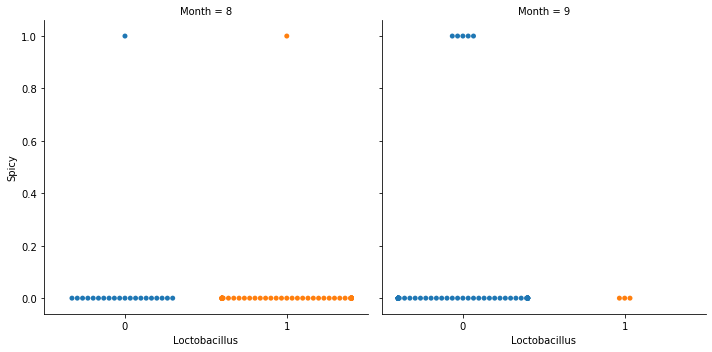

In [60]:
sns.catplot(x='Loctobacillus', y='Spicy', col='Month',kind='swarm', data=gaori)

# 전체 Catplot

In [61]:
eat_df.columns

Index(['Spicy_Measure', 'Spicy', 'Cold', 'Coffee', 'CO2', 'Alcohol', 'Milk',
       'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount',
       'Datetime', 'Year', 'Month', 'Day', 'Weekday', 'MON', 'TUE', 'WED',
       'THU', 'FRI', 'SAT', 'Hour', 'Minute', 'Name'],
      dtype='object')

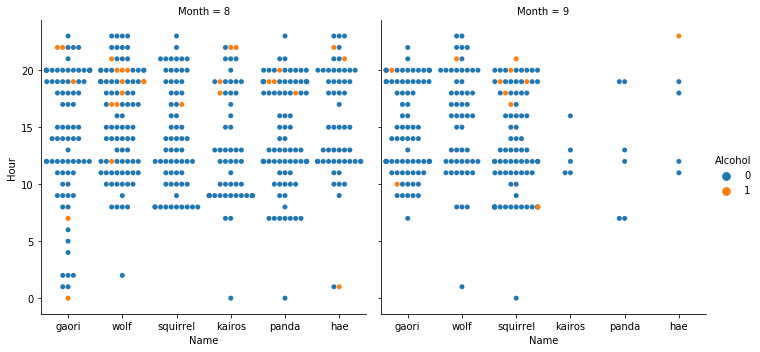

In [248]:
sns.catplot(x='Name', y='Hour', hue='Alcohol', col='Month', kind='swarm', data=eat_df)

# 시간대별 카테고리 분포

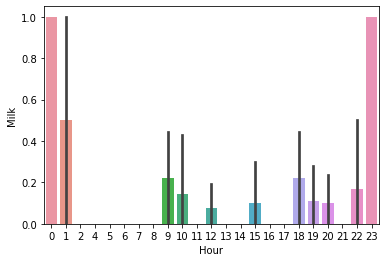

In [63]:
# sns.plot(x='Hour', y='Spicy', data=gaori)
# sns.barplot(x='Hour', y='Milk', data=gaori)
# sns.barplot(x='Hour', y='Vegitable', data=gaori)

sns.barplot(x='Hour', y='Milk', data=gaori)

## 개인별 시간대별 카테고리 분포

In [64]:
spicy = gaori.groupby('Hour')['Spicy'].sum().reset_index()
milk = gaori.groupby('Hour')['Milk'].sum().reset_index()
vegitable = gaori.groupby('Hour')['Vegitable'].sum().reset_index()
cold = gaori.groupby('Hour')['Cold'].sum().reset_index()
alcohol = gaori.groupby('Hour')['Alcohol'].sum().reset_index()
co2 = gaori.groupby('Hour')['CO2'].sum().reset_index()

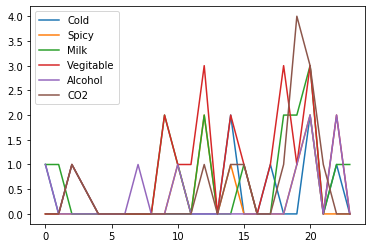

In [65]:
plt.plot('Hour', 'Cold', data=cold)
plt.plot('Hour', 'Spicy', data=spicy)
plt.plot('Hour', 'Milk', data=milk)
plt.plot('Hour', 'Vegitable', data=vegitable)
plt.plot('Hour', 'Alcohol', data=alcohol)
plt.plot('Hour', 'CO2', data=co2)

plt.legend(loc=0)
# sns.barplot(x='Hour', y='Vegitable', data=gaori)

# sns.barplot(x='Hour', y='Milk', data=gaori)

## 요일별 카테고리 분포

In [66]:
def WeekdayPlot(data):
    index_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    spicy = data.groupby('Weekday')['Spicy'].sum().reindex(index=index_weekday).reset_index()
    milk = data.groupby('Weekday')['Milk'].sum().reindex(index=index_weekday).reset_index()
    vegitable = data.groupby('Weekday')['Vegitable'].sum().reindex(index=index_weekday).reset_index()
    cold = data.groupby('Weekday')['Cold'].sum().reindex(index=index_weekday).reset_index()
    alcohol = data.groupby('Weekday')['Alcohol'].sum().reindex(index=index_weekday).reset_index()
    co2 = data.groupby('Weekday')['CO2'].sum().reindex(index=index_weekday).reset_index()

    plt.plot('Weekday', 'Cold', data=cold)
    plt.plot('Weekday', 'Spicy', data=spicy)
    plt.plot('Weekday', 'Milk', data=milk)
    plt.plot('Weekday', 'Vegitable', data=vegitable)
    plt.plot('Weekday', 'Alcohol', data=alcohol)
    plt.plot('Weekday', 'CO2', data=co2)

    plt.legend(loc=[1, 0])
    plt.show()

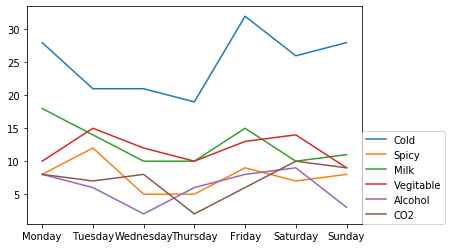

In [67]:
WeekdayPlot(eat_df)

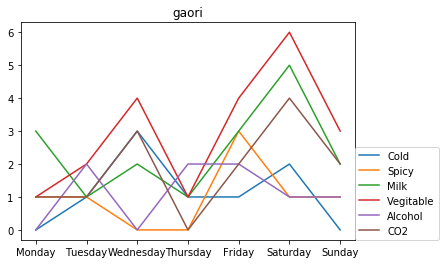

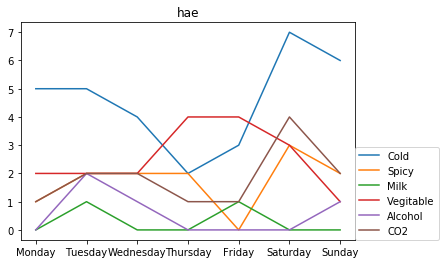

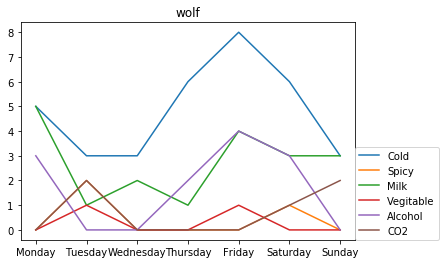

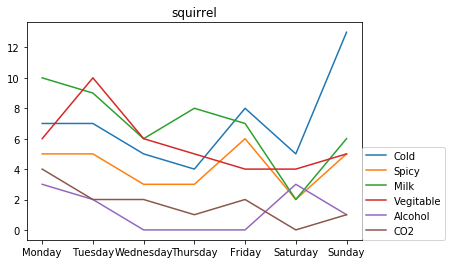

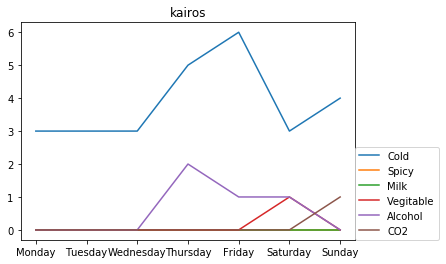

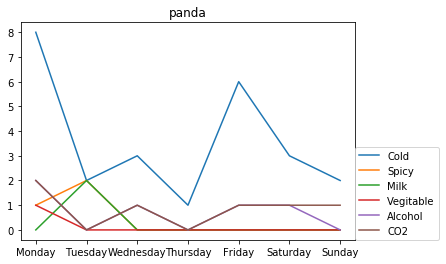

In [68]:
plt.title('gaori')
WeekdayPlot(gaori)

plt.title('hae')
WeekdayPlot(hae)

plt.title('wolf')
WeekdayPlot(wolf)

plt.title('squirrel')
WeekdayPlot(squirrel)

plt.title('kairos')
WeekdayPlot(kairos)

plt.title('panda')
WeekdayPlot(panda)

## Poop Data

In [250]:
poop_df.sample()

,Datetime,Year,Month,Day,Weekday,MON,TUE,WED,THU,FRI,SAT,Hour,Minute,Time,Status,Good,Soso,Menstruation,Name
157,2019-08-03,2019,8,3,Saturday,False,False,False,False,True,False,1,0,10.0,Soso,False,True,0.0,panda


In [251]:
gaori = poop_df[poop_df.Name == 'gaori']
wolf = poop_df[poop_df.Name == 'wolf']
hae = poop_df[poop_df.Name == 'hae']
kairos = poop_df[poop_df.Name == 'kairos']
squirrel = poop_df[poop_df.Name == 'squirrel']
panda = poop_df[poop_df.Name == 'panda']

In [252]:
poop_df.dtypes

Datetime        datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
Weekday                 object
MON                       bool
TUE                       bool
WED                       bool
THU                       bool
FRI                       bool
SAT                       bool
Hour                     int64
Minute                   int64
Time                   float64
Status                  object
Good                      bool
Soso                      bool
Menstruation           float64
Name                    object
dtype: object

### Categorical Plot

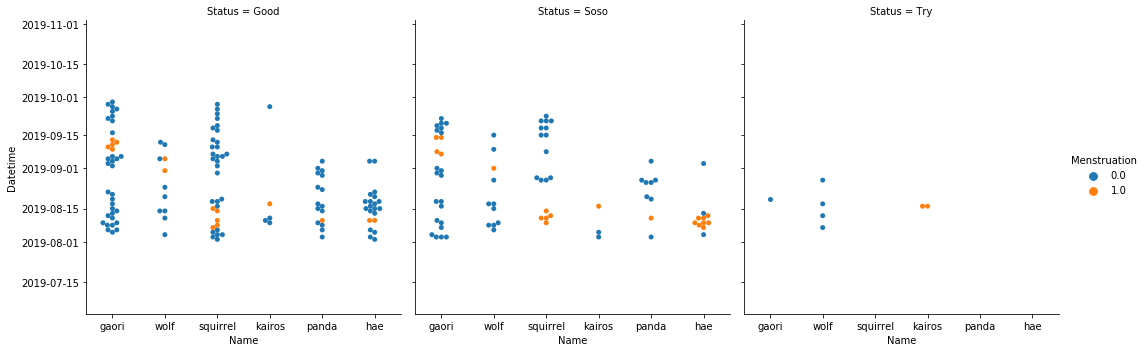

In [267]:
sns.catplot(x='Name', y='Datetime', hue='Menstruation', col='Status', col_order=status, kind='swarm', data=poop_df)
plt.show()

→ Menstruation = 1(생리중) 일 때 Status(배변 상태)가 나빠지는 것을 알 수 있다

### Violin Plot

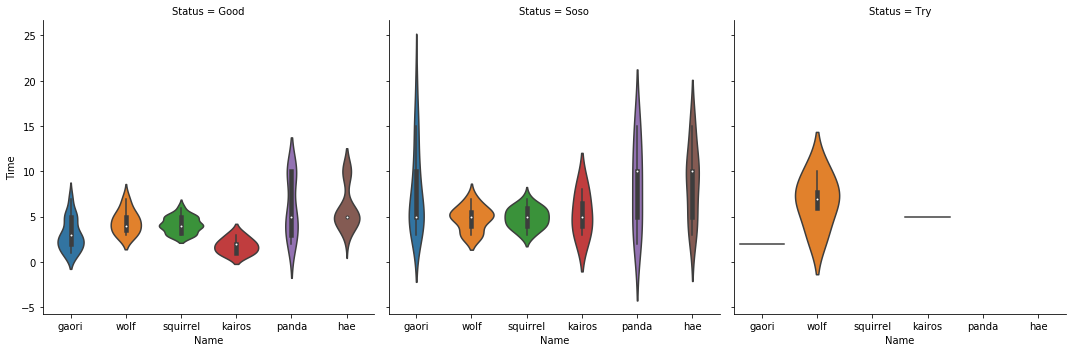

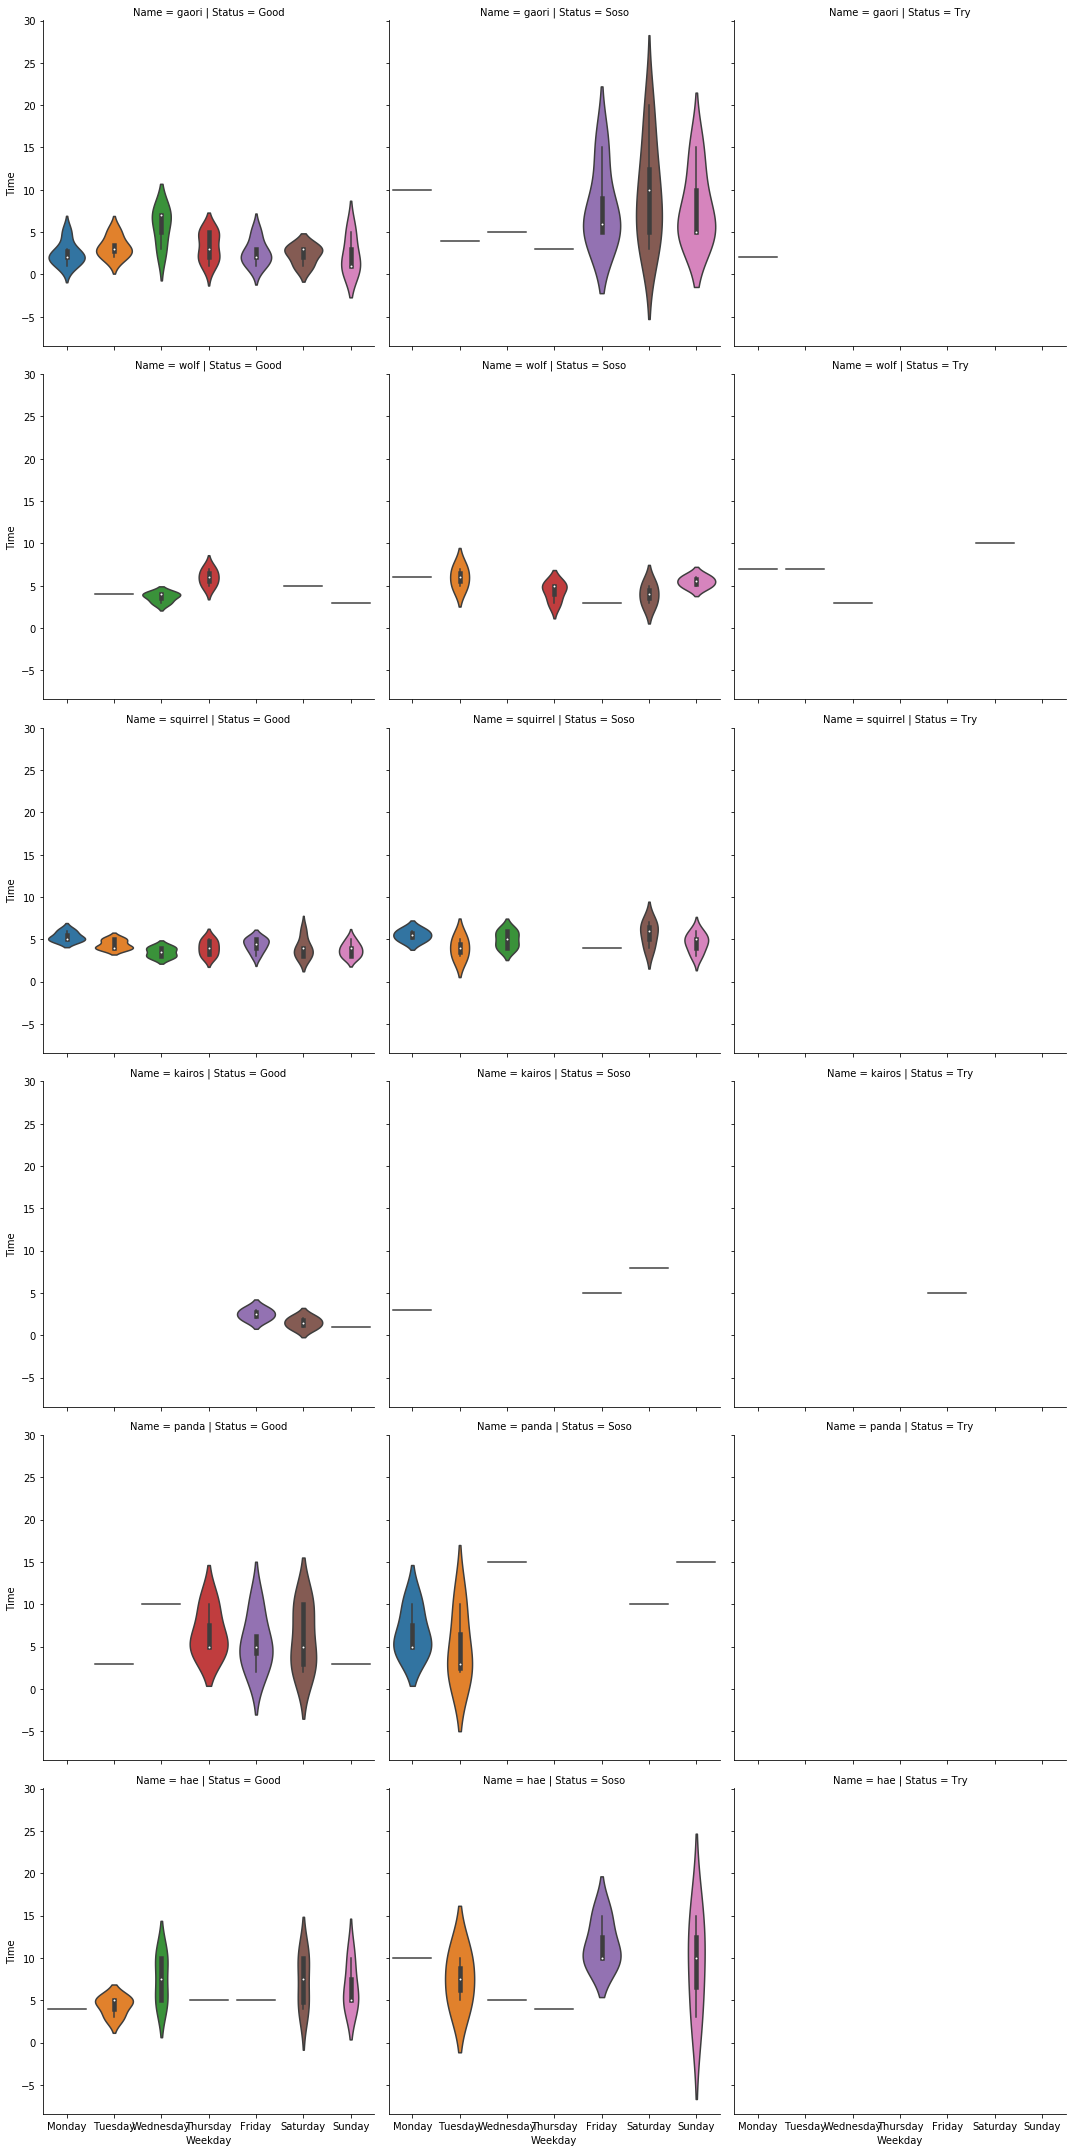

In [263]:
status = ['Good', 'Soso', 'Try']
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.catplot(x='Name', y='Time', col='Status', col_order=status , kind='violin', data=poop_df)
sns.catplot(x='Weekday', y='Time', col='Status', col_order=status , order=weekday, kind='violin', row='Name', data=poop_df)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=gaori)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=hae)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=wolf)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=squirrel)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=kairos)
# sns.catplot(x='Name', y='Time', col='Status', col_order=status, hue='Weekday', hue_order=weekday, kind='violin', data=panda)

→ Status(배변상태)가 나빠질수록 Time(배변시간)이 길어진다

→ 주말에 (Status)배변상태가 더 나빠진다

### Relation Plot

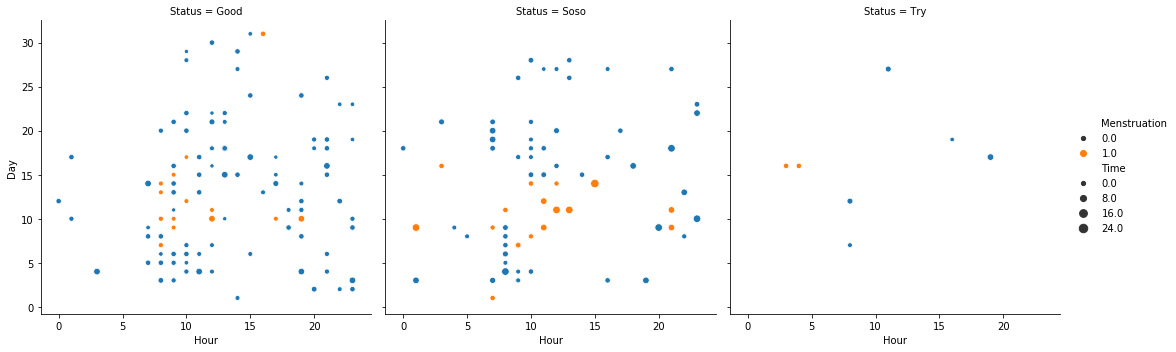

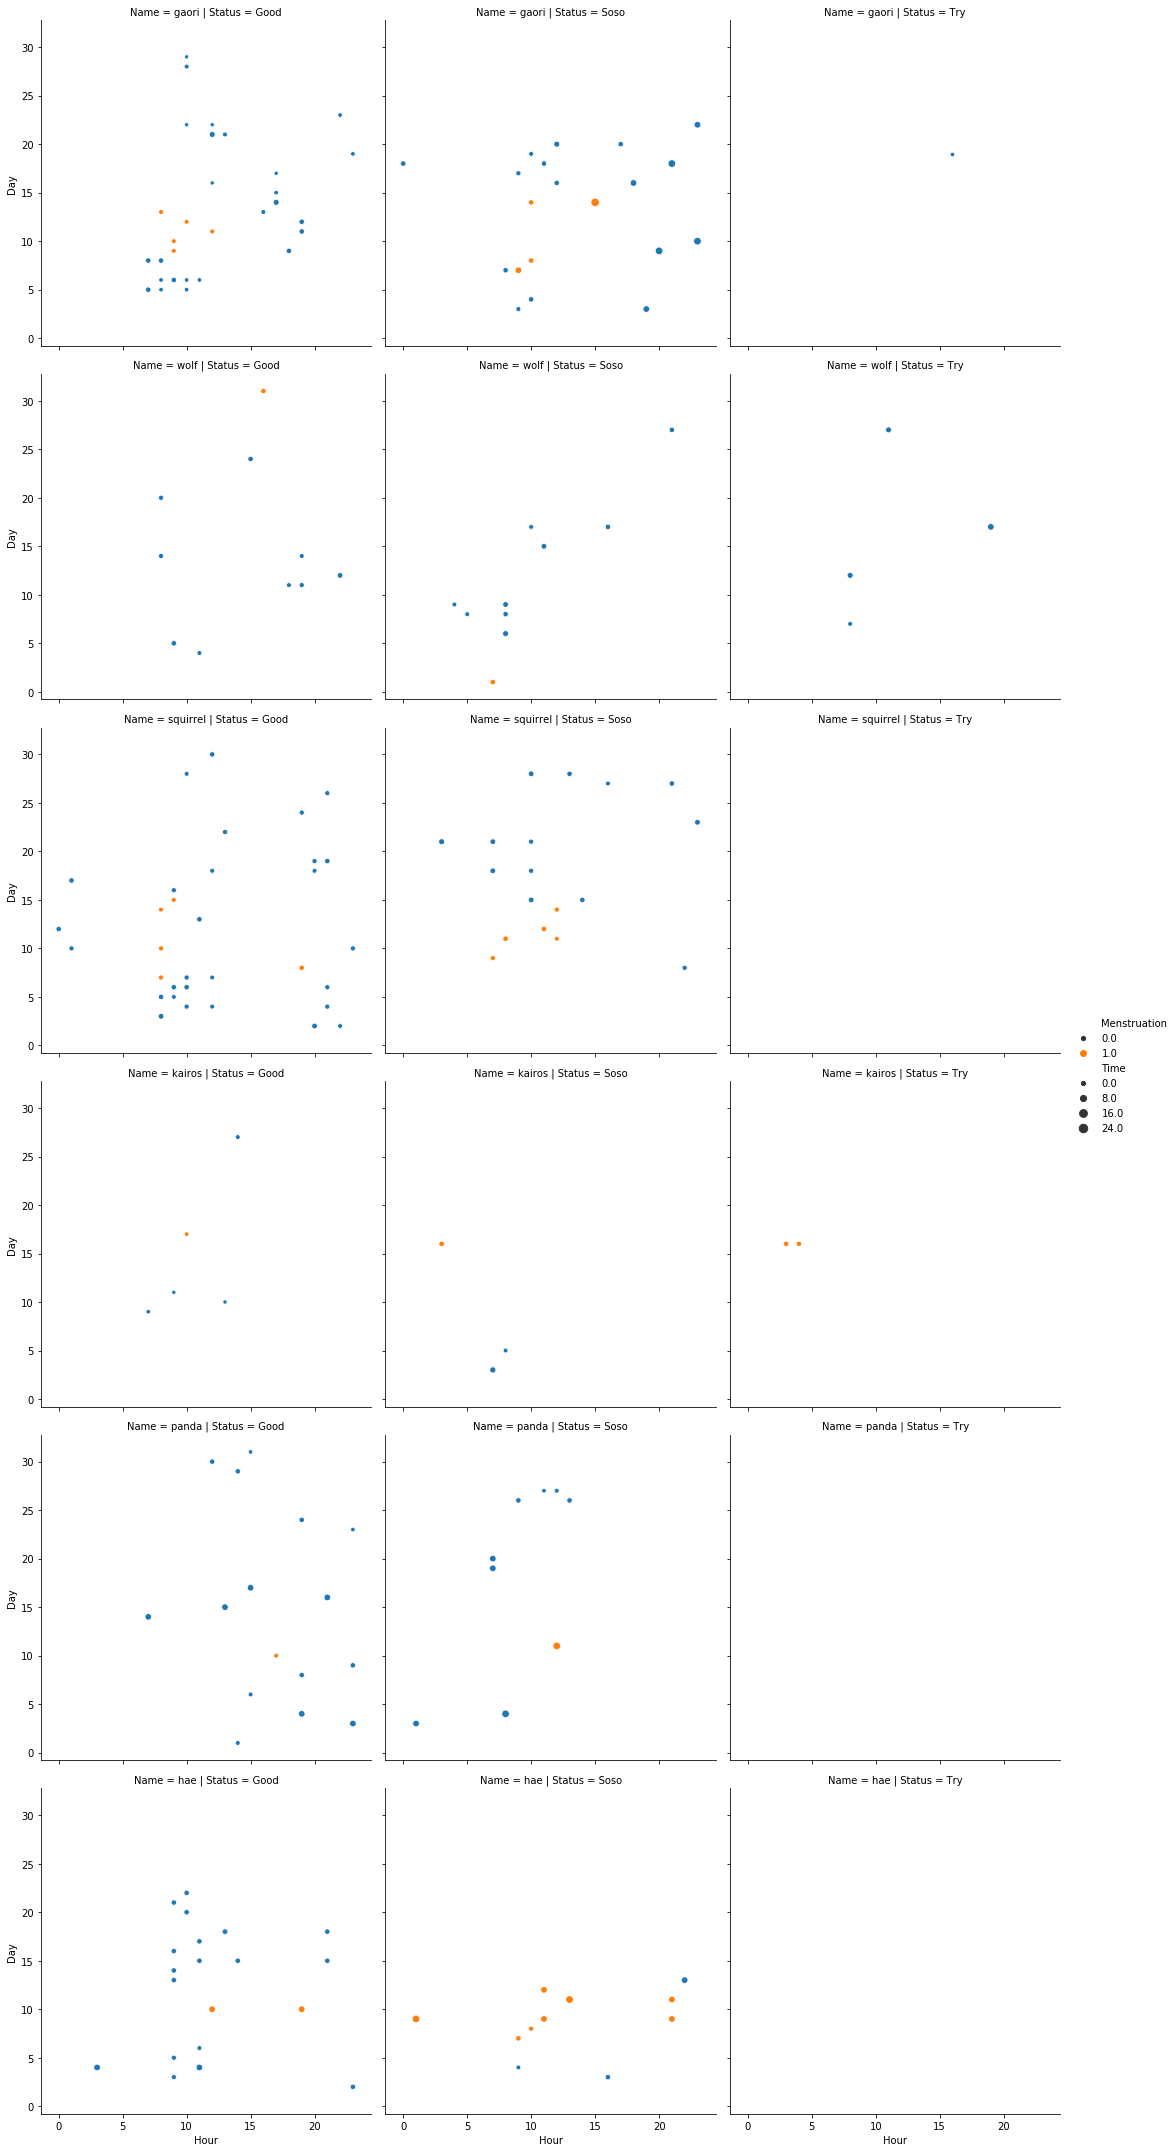

In [261]:
sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=poop_df)
sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, row='Name', data=poop_df)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=gaori)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=hae)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=squirrel)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=wolf)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=panda)
# sns.relplot(x='Hour', y='Day', size='Time', hue='Menstruation', col='Status', col_order=status, data=kairos)

→ Status(배변상태)가 나빠질수록 Time(배변시간)이 길어진다

→  Menstruation = 1(생리중)일 때 Status(배변상태)가 나빠지고, Time(배변시간)도 길어진다

# 날짜별 Groupby

In [86]:
eat_df.columns

Index(['Spicy_Measure', 'Spicy', 'Cold', 'Coffee', 'CO2', 'Alcohol', 'Milk',
       'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount',
       'Datetime', 'Year', 'Month', 'Day', 'Weekday', 'MON', 'TUE', 'WED',
       'THU', 'FRI', 'SAT', 'Hour', 'Minute', 'Name'],
      dtype='object')

In [93]:
eat_sum = eat_df.groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()

eat_sum.sample()

,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water
Datetime,,,,,,,,,
2019-08-06,1,2,3,1,1,4,21,0,9


In [95]:
eat_sum_gaori = eat_df[eat_df['Name'] == 'gaori'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()
eat_sum_hae = eat_df[eat_df['Name'] == 'hae'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()
eat_sum_wolf = eat_df[eat_df['Name'] == 'wolf'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()
eat_sum_squirrel = eat_df[eat_df['Name'] == 'squirrel'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()
eat_sum_kairos = eat_df[eat_df['Name'] == 'kairos'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()
eat_sum_panda = eat_df[eat_df['Name'] == 'panda'].groupby('Datetime')['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Extraordinary', 'Water', 'Water_Amount'].sum()

eat_sum_gaori.sample()

,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water
Datetime,,,,,,,,,
2019-09-11,0,0,0,0,0,0,0,5,5


## Merge(eat_sum + poop)
8 시간 후의 poop 과 맞추자

In [96]:
poop_df.columns

Index(['Datetime', 'Year', 'Month', 'Day', 'Weekday', 'MON', 'TUE', 'WED',
       'THU', 'FRI', 'SAT', 'Hour', 'Minute', 'Time', 'Status', 'Good', 'Soso',
       'Menstruation', 'Name'],
      dtype='object')

In [ ]:
eat_sum(merge)

분석 아이디어: 음식으로 PCA 해서 Good/Soso/Try 로 시각화
예측: 앞으로 얼마나 시간 걸릴지

# 프로젝트 시작시 개인별 장 상태에 따라 분류

In [290]:
eat_sum_poop.sample()

,Datetime,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water,...,FRI,SAT,Hour,Minute,Time,Status,Good,Soso,Menstruation,Name
53,2019-08-11,0,6,3,0,1,1,15,0,7,...,False,False,18,0,3.0,Good,True,False,0.0,wolf


In [296]:
eat_sum_poop['Status_encode'] = eat_sum_poop['Status'].replace({'Good':3, 'Soso':2, 'Try':1})

eat_sum_poop.sample()

,Datetime,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water,...,Hour,Minute,Time,Status,Good,Soso,Menstruation,Name,Status(encode),Status_encode
49,2019-08-10,1,7,3,3,1,2,21,0,8,...,17,50,3.0,Good,True,False,1.0,panda,3.0,3.0


In [390]:
eat_sum_poop.columns

Index(['Datetime', 'Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable',
       'Loctobacillus', 'Extraordinary', 'Water', 'Year', 'Month', 'Day',
       'Weekday', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'Hour', 'Minute',
       'Time', 'Status', 'Good', 'Soso', 'Menstruation', 'Name',
       'Status(encode)', 'Status_encode', 'Class'],
      dtype='object')

# Clustering
별로 안 맞음,,,

In [332]:
eat_sum_poop['Class'] = eat_sum_poop['Name'].replace({'gaori':0, 'hae':0, 'panda':1, 'squirrel':1, 'wolf':2, 'kairos': 2})

In [386]:
from sklearn.cluster import KMeans

In [387]:
km = KMeans(n_clusters=3)

In [393]:
eat_sum_poop.isnull().sum()

Datetime           0
Spicy              0
Cold               0
Milk               0
Coffee             0
Alcohol            0
Vegitable          0
Loctobacillus      0
Extraordinary      0
Water              0
Year               0
Month              0
Day                0
Weekday            0
MON                0
TUE                0
WED                0
THU                0
FRI                0
SAT                0
Hour               0
Minute             0
Time              16
Status             6
Good               0
Soso               0
Menstruation       0
Name               0
Status(encode)     6
Status_encode      6
Class              0
dtype: int64

In [395]:
eat_sum_poop.dropna(inplace=True)

In [396]:
eat_sum_poop.isnull().sum()

Datetime          0
Spicy             0
Cold              0
Milk              0
Coffee            0
Alcohol           0
Vegitable         0
Loctobacillus     0
Extraordinary     0
Water             0
Year              0
Month             0
Day               0
Weekday           0
MON               0
TUE               0
WED               0
THU               0
FRI               0
SAT               0
Hour              0
Minute            0
Time              0
Status            0
Good              0
Soso              0
Menstruation      0
Name              0
Status(encode)    0
Status_encode     0
Class             0
dtype: int64

In [398]:
x = eat_sum_poop[['Spicy', 'Cold', 'Milk', 'Coffee', 'Alcohol', 'Vegitable', 'Loctobacillus', 'Water', 'Time', 'Status_encode', 'Menstruation']]

In [399]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [401]:
km.predict(x)

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [404]:
eat_sum_poop['Class'].values

array([1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0],
      dtype=int64)

# Regression

In [297]:
from statsmodels.formula.api import ols

In [385]:
ols('Status_encode ~ (Spicy+Cold+Milk++Loctobacillus+Menstruation+Water)*Class + Alcohol*Coffee', eat_sum_poop).fit().summary()
# ols('Status_encode ~ Water*Loctobacillus*Cold*Spicy*Alcohol', eat_sum_poop[eat_sum_poop['Name'] == 'gaori']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Status_encode   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.853
Date:                Thu, 03 Oct 2019   Prob (F-statistic):             0.0271
Time:                        14:23:31   Log-Likelihood:                -159.46
No. Observations:                 208   AIC:                             352.9
Df Residuals:                     191   BIC:                             409.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5904      0.180     14.414      0.000       2.236       2.945
Spicy                   0.0346      0.070      0.493      0.622      -0.104       0.173
Cold                   -0.0099      0.041     -0.241      0.810      -0.091       0.071
Milk                    0.0836      0.057      1.477      0.141      -0.028       0.195
Loctobacillus          -0.0040      0.015     -0.273      0.785      -0.033       0.025
Menstruation           -0.2659      0.139     -1.909      0.058      -0.541       0.009
Water                  -0.0042      0.039     -0.106      0.916      -0.082       0.074
Class                  -0.1341      0.170     -0.786      0.433      -0.470       0.202
Spicy:Class            -0.1246      0.061     -2.035      0.043      -0.245      -0.004
Cold:Class              0.0537      0.031      1.714      0.088      -0.008       0.115
Milk:Class             -0.0460      0.054     -0.847      0.398      -0.153       0.061
Loctobacillus:Class    -0.0270      0.014     -1.943      0.053      -0.054       0.000
Menstruation:Class      0.1046      0.134      0.783      0.434      -0.159       0.368
Water:Class             0.0543      0.036      1.495      0.136      -0.017       0.126
Alcohol                -0.0264      0.069     -0.381      0.703      -0.163       0.110
Coffee                 -0.0190      0.044     -0.428      0.669      -0.107       0.069
Alcohol:Coffee          0.0450      0.029      1.575      0.117      -0.011       0.101
==============================================================================
Omnibus:                       14.800   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.511
Skew:                          -0.594   Prob(JB):                     0.000706
Kurtosis:                       2.486   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## glm Regression

In [406]:
from statsmodels.formula.api import glm
from statsmodels.genmod.families.family import Binomial

In [409]:
glm('Status_encode ~ Class*Loctobacillus', eat_sum_poop, family=Binomial()).fit().summary()

C:\Users\Minju\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning:

divide by zero encountered in true_divide



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Status_encode   No. Observations:                  198
Model:                            GLM   Df Residuals:                      194
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 03 Oct 2019   Deviance:                          nan
Time:                        14:51:55   Pearson chi2:                 2.45e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.391e+17   1.08e+07   6.84e+10      0.000    7.39e+17    7.39e+17
Class               -3.431e+16   1.08e+07  -3.17e+09      0.000   -3.43e+16   -3.43e+16
Loctobacillus         -6.5e+12   7.24e+05  -8.98e+06      0.000    -6.5e+12    -6.5e+12
Class:Loctobacillus -2.175e+15    7.2e+05  -3.02e+09      0.000   -2.17e+15   -2.17e+15
=======================================================================================
"""

### eat 으로 PCA 해서 Good/Soso/Try 로 시각화
의미있는지 모르겠음

In [112]:
eat_sum_poop = eat_sum.merge(poop_df, how='left', on='Datetime')

eat_sum_poop.sample()

,Datetime,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water,...,FRI,SAT,Hour,Minute,Time,Status,Good,Soso,Menstruation,Name
143,2019-09-02,3,4,3,4,3,0,6,1,5,...,False,False,0,0,NaN,Good,True,False,0.0,gaori


#### 표준화

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scale = StandardScaler()

In [137]:
x = scale.fit_transform(eat_sum_poop.iloc[:, 1:10])

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



#### PCA

In [98]:
from sklearn.decomposition import PCA

In [99]:
p = PCA()

In [147]:
eat_sum_poop.iloc[:, 1:10].sample()

,Spicy,Cold,Milk,Coffee,Alcohol,Vegitable,Loctobacillus,Extraordinary,Water
183,2,3,1,1,0,3,0,1,3


#### Componenet 수 결정

In [138]:
# score = p.fit_transform(eat_sum_poop.iloc[:, 1:10]) 표준화 안한것
score = p.fit_transform(x)

In [139]:
p.explained_variance_

array([4.30039302, 1.26623542, 0.9699171 , 0.79340739, 0.66537892,
       0.44255075, 0.39440883, 0.12848982, 0.08147226])

In [140]:
p.explained_variance_ratio_

array([0.47558864, 0.14003538, 0.10726498, 0.08774443, 0.07358552,
       0.04894253, 0.04361842, 0.01420993, 0.00901017])

#### 결정한 Component 수를 적용

In [141]:
# pca = PCA(n_components=3)
pca = PCA(n_components=2)

In [142]:
# score2 = pca.fit_transform(eat_sum_poop.iloc[:, 1:10]) 표준화 전
score2 = pca.fit_transform(x)

In [143]:
pca.explained_variance_ratio_

array([0.47558864, 0.14003538])

In [144]:
# score_df = pd.DataFrame(score2, columns=['Comp1', 'Comp2', 'Comp3'])
score_df = pd.DataFrame(score2, columns=['Comp1', 'Comp2'])

In [145]:
score_df['Status'] = poop['Status']

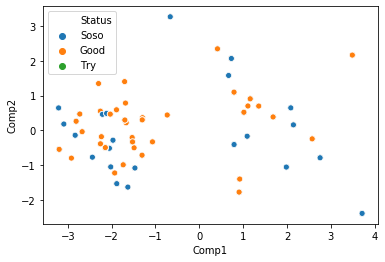

In [146]:
# sns.scatterplot('Comp1', 'Comp2', 'Comp3', data=score_df)
sns.scatterplot('Comp1', 'Comp2', hue='Status', data=score_df)

### pca 시각화 함수

In [273]:
def pca_v(data):
    
    x = scale.fit_transform(data.iloc[:, 1:10])
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    score = pca.fit_transform(x)
    print(('pca.explained_variance_ratio_: '), pca.explained_variance_ratio_)
    
    score_df = pd.DataFrame(score, columns=['Comp1', 'Comp2'])
    score_df['Status'] = data['Status']
    
    import seaborn as sns
    sns.scatterplot('Comp1', 'Comp2', hue='Status', data=score_df)
    plt.show()

### 개인별

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



pca.explained_variance_ratio_:  [0.49347764 0.14594844]


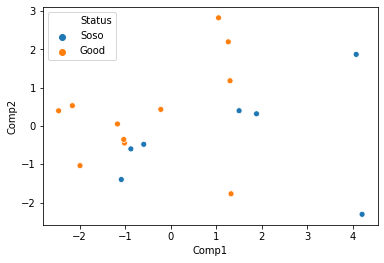

pca.explained_variance_ratio_:  [0.39133805 0.2181005 ]


C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\Minju\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



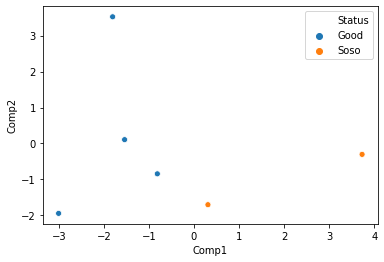

In [275]:
pca_v(eat_sum_poop[eat_sum_poop['Name'] == 'gaori'])
pca_v(eat_sum_poop[eat_sum_poop['Name'] == 'hae'])

#### NMF

In [149]:
from sklearn.decomposition import NMF

In [150]:
nmf = NMF(n_components=2)

In [152]:
score = nmf.fit_transform(eat_sum_poop.iloc[:, 1:10])

In [153]:
nmf.reconstruction_err_

46.823896200745416

In [155]:
nmf.components_

array([[ 0.38977098,  4.45613159,  1.47881318,  2.17331822,  0.72146566,
         1.87261934, 13.29475875,  0.        ,  4.04547012],
       [ 1.50362655,  1.70085745,  1.58535617,  0.38306404,  0.64191789,
         1.07611269,  0.        ,  1.71591712,  5.19849172]])

In [156]:
score_df = pd.DataFrame(score, columns=['Comp1', 'Comp2'])

In [157]:
score_df['Status'] = eat_sum_poop['Status']

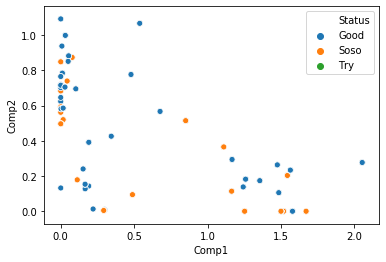

In [158]:
sns.scatterplot('Comp1', 'Comp2', hue='Status', data=score_df)

# 예측 선형회귀